# Aula 5 - K-means
### Relembrando Aprendizado Não-Supervisionado

 Aprendizado Supervisionado: Classificação / Regressão
 Premissa: Eu já conheço de antemão as classes

 Aprendizado Não Supervisionado: 
 Premissa: Eu não conheço de antemão as classes ou targets
 Os métodos de aprendizado não supervisionado vão nos ajudar a 
 descobrir padrões inerentes aos dados que não conhecemos de
 antemão

### Passo a passo

 O algoritmo do K-Means se utiliza de similaridades para conseguir agrupar os dados, seu funcionamento segue os seguintes passos:
  1) definir o número de grupos (clusters) que eu espero encontrar nos meus dados - Valor de **K**
  2) gerar **K** pontos aleatórios que representam os centróides de cada grupo
  3) atribuir um grupo para cada observação baseado na distância do centroid 
  4) atualizar os centroides dos clusters sendo o ponto médio  
Repete-se os itens 3 e 4 até:      
    - número máximo de iterações  
    - estabelecer uma tolerância sendo que: caso a variação dos centroides seja pequena o suficiente, entendemos que houve uma convergência

## Na prática

In [1]:
# bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans # importando o k-means

Para ilustrar o K-means vamos criar uma amostra de dados aleatórios

In [2]:
#parâmetros
numAmostras = 1000
numClusters = 3
numFeatures = 2

# gerando pontos aleatórios
matFeatures = np.zeros((numAmostras, numFeatures)) #matriz bidimensional com N amostras
for i in range(numAmostras): #varrer o total de amostras
	for j in range(numFeatures): #varrer o total de características
		if i < numAmostras/2:
			#pontos aleatórios dentro de uma distribuição normal
			matFeatures[i,j] = np.random.normal(0.1,0.3)
		else:
			#pontos aleatórios dentro de uma distribuição normal
			matFeatures[i,j] = np.random.normal(0.2,0.1)

In [3]:
matFeatures

array([[ 0.12378665, -0.05839902],
       [-0.04629767,  0.57370184],
       [-0.33430841,  0.50954697],
       ...,
       [ 0.10205116,  0.16617462],
       [ 0.23916068,  0.14835367],
       [ 0.18050508,  0.21877871]])

In [25]:
kmeans_model = KMeans(n_clusters=3, random_state=42) # instanciando meu modelo kmeans

In [21]:
kmeans_model.fit(matFeatures)

c:\Users\Bruno Scale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bruno Scale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [22]:
print(kmeans_model.labels_)

[2 3 3 3 2 2 0 3 3 1 0 0 1 1 0 0 1 0 0 2 1 2 1 0 3 2 3 0 2 3 1 2 3 3 0 2 2
 1 1 0 2 1 0 2 2 3 0 0 2 2 1 1 0 2 2 0 2 0 2 1 0 0 2 1 3 1 0 2 2 1 1 0 2 0
 2 1 2 1 2 2 1 0 0 2 2 3 1 0 0 0 0 3 3 3 3 0 2 2 2 1 1 2 2 2 2 1 0 2 1 0 2
 0 0 0 1 0 2 0 3 2 3 3 1 2 2 1 1 0 1 0 3 3 0 2 0 3 0 0 3 1 0 1 1 0 3 0 3 2
 2 0 1 0 2 0 0 0 1 0 0 2 2 1 1 1 1 1 1 0 3 1 0 2 3 2 0 1 3 2 2 3 3 1 0 0 1
 0 2 3 0 0 0 1 0 2 1 1 2 1 1 1 0 1 2 0 1 0 0 1 2 3 3 3 3 0 2 0 3 1 0 3 1 0
 1 3 2 2 2 1 1 0 0 2 0 3 3 0 0 1 1 2 0 2 2 0 2 2 2 2 1 1 2 3 2 0 3 2 0 1 2
 3 3 0 1 1 3 1 0 0 2 2 0 1 3 1 2 2 1 0 0 3 1 2 1 3 1 2 1 2 1 0 1 0 0 2 0 2
 2 2 2 0 0 1 1 1 0 3 3 1 3 3 3 3 2 1 3 1 2 3 3 0 2 1 2 3 2 0 0 1 3 3 0 2 3
 3 0 3 2 2 0 3 2 3 0 2 3 1 1 2 0 1 1 3 0 0 0 0 0 2 1 3 3 0 0 3 0 1 1 2 1 2
 1 2 1 2 1 3 0 1 3 0 0 1 0 3 0 3 1 0 3 1 1 2 2 1 1 0 0 0 1 0 2 3 1 3 0 3 0
 1 2 3 0 0 0 3 1 0 3 1 2 3 2 0 3 2 2 0 0 3 0 2 0 3 1 2 0 0 3 2 0 1 2 0 1 2
 0 2 0 1 3 0 2 0 2 0 1 2 2 3 0 0 2 2 3 2 1 1 1 2 0 3 2 0 1 2 0 1 0 0 3 1 0
 3 3 2 3 1 1 1 3 3 3 1 1 

In [23]:
print(kmeans_model.cluster_centers_)

[[-0.21425157  0.0241769 ]
 [ 0.24986287  0.17874963]
 [ 0.28070989 -0.20244908]
 [ 0.06125022  0.38587033]]


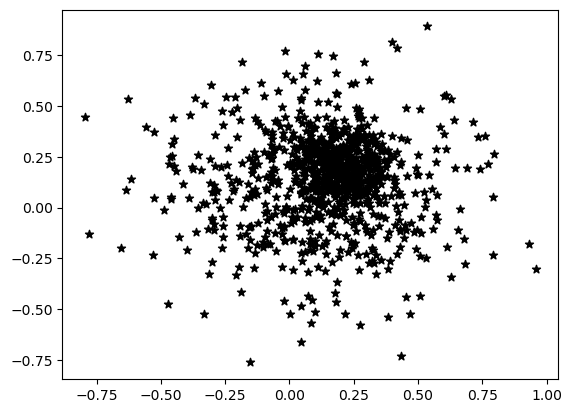

In [24]:
plt.figure()
plt.scatter(matFeatures[:,0], matFeatures[:,1], color='black', marker='*');

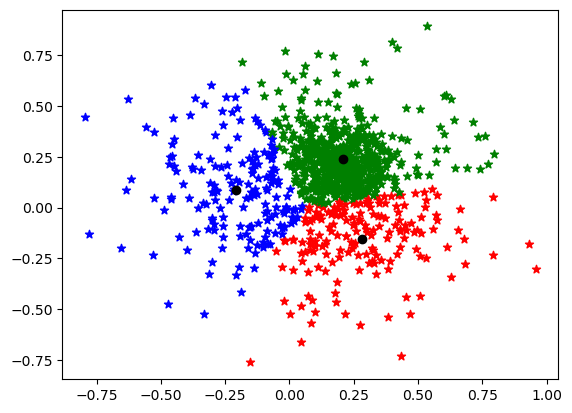

In [19]:
plt.figure()
for i in range(numAmostras):
    if kmeans_model.labels_[i] == 0:
        plt.scatter(matFeatures[i, 0], matFeatures[i, 1], color='blue', marker='*')
    elif kmeans_model.labels_[i] == 1:
        plt.scatter(matFeatures[i, 0], matFeatures[i, 1], color='green', marker='*')
    else:
        plt.scatter(matFeatures[i, 0], matFeatures[i, 1], color='red', marker='*')

plt.scatter(kmeans_model.cluster_centers_[0][0], kmeans_model.cluster_centers_[0][1], color='black')
plt.scatter(kmeans_model.cluster_centers_[1][0], kmeans_model.cluster_centers_[1][1], color='black')
plt.scatter(kmeans_model.cluster_centers_[2][0], kmeans_model.cluster_centers_[2][1], color='black');

A classe do sklearn que possui o K-means é o cluster, cujo pacote é:

- [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

E os principais hiperparâmetros a serem ajustados são:

- `n_clusters` : número de clusters que o algoritmo usará para agrupar nossos dados

- `max_iter` : critério de parada com máximo de iterações para o algoritmo realizar até que se definam os clusters

<img src="https://cdn.sanity.io/images/kuana2sp/production/756bc08204c16857f543d86af5e24942b00f05b5-1024x576.gif?w=1080&fit=max&auto=format">